<a href="https://colab.research.google.com/github/DivyavaniPeddaboina/-Codsoft--Task-1-Spam-SMS-Detection-/blob/main/audio_sentiment_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
!ls


'archive (2).zip'   drive   sample_data


In [ ]:
import zipfile

with zipfile.ZipFile("archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall("ravdess_data")  # Extracts into folder ravdess_data

In [ ]:
!find ravdess_data -name "*.wav" | head -n 10

ravdess_data/Actor_07/03-01-04-01-01-01-07.wav
ravdess_data/Actor_07/03-01-06-02-01-01-07.wav
ravdess_data/Actor_07/03-01-02-01-02-02-07.wav
ravdess_data/Actor_07/03-01-07-01-01-02-07.wav
ravdess_data/Actor_07/03-01-04-02-01-01-07.wav
ravdess_data/Actor_07/03-01-06-01-02-01-07.wav
ravdess_data/Actor_07/03-01-05-02-01-02-07.wav
ravdess_data/Actor_07/03-01-06-01-02-02-07.wav
ravdess_data/Actor_07/03-01-01-01-02-01-07.wav
ravdess_data/Actor_07/03-01-03-02-01-01-07.wav


In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

DATASET_PATH = "ravdess_data"
SAMPLE_RATE = 22050
MAX_DURATION = 4.0
X, Y = [], []

def extract_features(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=MAX_DURATION)
        if len(audio) < int(SAMPLE_RATE * MAX_DURATION * 0.5):
            return None
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        if mfccs.shape[1] == 0:
            return None
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")
        return None

emotions = {
    "01": "neutral", "02": "calm", "03": "happy", "04": "sad",
    "05": "angry", "06": "fearful", "07": "disgust", "08": "surprised"
}

for root, dirs, files in os.walk(DATASET_PATH):
    for file in files:
        if file.endswith(".wav"):
            try:
                code = file.split("-")[2]
                label = emotions.get(code)
                path = os.path.join(root, file)
                features = extract_features(path)
                if features is not None and label:
                    X.append(features)
                    Y.append(label)
            except Exception as e:
                print(f"❌ Failed: {file} => {e}")

print(f"✅ Total samples extracted: {len(X)}")

✅ Total samples extracted: 2880


In [ ]:
if len(X) == 0:
    raise ValueError("❌ No features extracted. Please check dataset.")

X = np.array(X)
le = LabelEncoder()
y = to_categorical(le.fit_transform(Y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(40,1)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.1806 - loss: 2.0397 - val_accuracy: 0.2500 - val_loss: 1.9483
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.2443 - loss: 1.9218 - val_accuracy: 0.3090 - val_loss: 1.8466
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.2758 - loss: 1.8597 - val_accuracy: 0.2726 - val_loss: 1.8628
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.3063 - loss: 1.7870 - val_accuracy: 0.3021 - val_loss: 1.7660
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.3212 - loss: 1.7396 - val_accuracy: 0.3073 - val_loss: 1.7947
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.3454 - loss: 1.7225 - val_accuracy: 0.2899 - val_loss: 1.7630
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.3575 - loss: 1.6753 - val_accuracy: 0.3177 - val_loss: 1.7160
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.3487 - loss: 1.6434 - val_accuracy: 0.3542 -

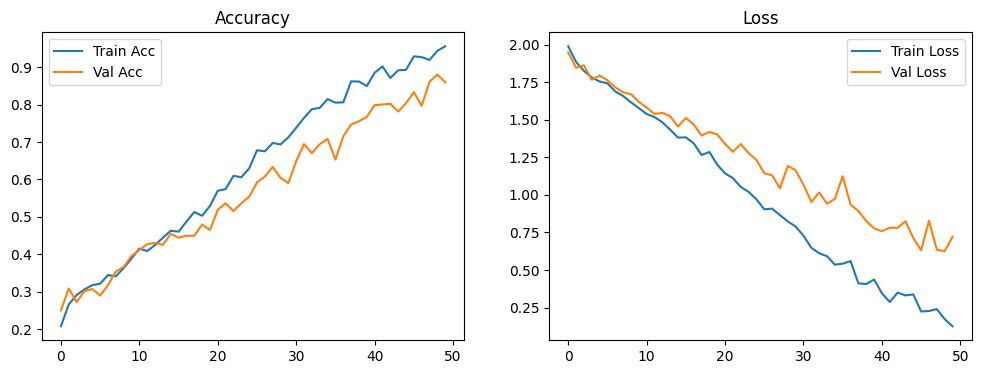


🎯 Final Test Accuracy: 85.94%


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🎯 Final Test Accuracy: {score[1]*100:.2f}%")

In [ ]:
!pip install gradio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
import gradio as gr

def predict_emotion_ui(audio):
    features = extract_features(audio)
    if features is not None:
        reshaped = np.expand_dims(np.expand_dims(features, axis=0), axis=2)
        prediction = model.predict(reshaped)
        predicted_label = le.inverse_transform([np.argmax(prediction)])
        return f"Predicted Emotion: {predicted_label[0]}"
    else:
        return "❌ Could not process this audio."

interface = gr.Interface(
    fn=predict_emotion_ui,
    inputs=gr.Audio(type="filepath"),
    outputs="text",
    title="🎤 Speech Emotion Detector",
    description="Upload a short .wav file with speech and emotion. The model will predict the emotion."
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7cbdcf1b811d753847.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
